In [1]:
import numpy as np
import pandas as pd
import copy
import random
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras.applications import DenseNet121
#from tensorflow.keras.models import Model,load_model
from keras.models import Model,load_model
from keras.initializers import glorot_uniform
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint,LearningRateScheduler
from IPython.display import display
#from tensorflow.python.keras import *
from keras.preprocessing.image import ImageDataGenerator
from keras import layers,optimizers
#from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras

## Key Facial Point Detection

In [2]:
keyfacial_df = pd.read_csv("Emotion AI Dataset/data.csv")
keyfacial_df

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
...                 ...                ...                 ...   
2135          67.180378          35.816373           33.239956   
2136          65.724490          36.301020           25.377551   
2137          68.430866          38.651975           28.895857   
2138          64.152180          30.691592           27.000898   
2139          66.683755          34.483429           30.784490   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              36.421678                59.582075                39.647423   
1              33.448715                58.856170                35.274349   
2              34.909642                59.412000                36.320968   
3              37.261774                60.003339                39.127179   
4              38.042032                58.565890                39.621261   
...                  ...                      ...                      ...   
2135           34.921932                59.347973                37.000904   
2136           37.311224                58.530612                37.739796   
2137           37.617027                61.659350                40.100902   
2138           40.868082                56.505624                34.126963   
2139           38.578939                59.255347                36.065143   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
0                   73.130346                39.969997   
1                   70.722723                36.187166   
2                   70.984421                36.320968   
3                   72.314713                38.380967   
4                   72.515926                39.884466   
...                       ...                      ...   
2135                72.667896                37.097600   
2136                74.448980                37.525510   
2137                75.586792                40.219182   
2138                73.436776                28.556335   
2139                73.942694                34.624653   

      right_eye_inner_corner_x  right_eye_inner_corner_y  ...  nose_tip_y  \
0                    36.356571                 37.389402  ...   57.066803   
1                    36.034723                 34.361532  ...   55.660936   
2                    37.678105                 36.320968  ...   53.538947   
3                    37.618643                 38.754115  ...   54.166539   
4                    36.982380                 39.094852  ...   64.889521   
...                        ...                       ...  ...         ...   
2135                 39.404349                 36.589944  ...   60.065396   
2136                 33.551020                 38.107143  ...   62.472789   
2137                 37.665118                 39.087245  ...   63.289576   
2138                 34.746122                 40.506939  ...   59.735799   
2139                 37.478531                 39.398041  ...   59.269388   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0               61.195308            79.970165             28.614496   
1               56.421447            76.352000             35.122383   
2               60.822947            73.014316             33.726316   
3               65.598887            72.703722             37.245496   
4               60.671411            77.523239             31.191755   
...                   ...                  ...                   ...   
2135            64.397610            73.248393             35.446431   
2136            66.928121            79.229046             28.015377   
2137  

In [3]:
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [4]:
keyfacial_df['Image'].shape

(2140,)

In [5]:
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x,dtype = int,sep= ' ').reshape(96,96))
keyfacial_df['Image'][0].shape

(96, 96)

In [6]:
keyfacial_df.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        2140.000000        2140.000000         2140.000000   
mean           66.221549          36.842274           29.640269   
std             2.087683           2.294027            2.051575   
min            47.835757          23.832996           18.922611   
25%            65.046300          35.468842           28.472224   
50%            66.129065          36.913319           29.655440   
75%            67.332093          38.286438           30.858673   
max            78.013082          46.132421           42.495172   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         2140.000000              2140.000000              2140.000000   
mean            37.063815                59.272128                37.856014   
std              2.234334                 2.005631                 2.034500   
min             24.773072                41.779381                27.190098   
25%             35.818377                58.113054                36.607950   
50%             37.048085                59.327154                37.845220   
75%             38.333884                60.521492                39.195431   
max             45.980981                69.023030                47.190316   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2140.000000              2140.000000   
mean                 73.412473                37.640110   
std                   2.701639                 2.684162   
min                  52.947144                26.250023   
25%                  71.741978                36.102409   
50%                  73.240045                37.624207   
75%                  74.978684                39.308331   
max                  87.032252                49.653825   

       right_eye_inner_corner_x  right_eye_inner_corner_y  ...   nose_tip_x  \
count               2140.000000               2140.000000  ...  2140.000000   
mean                  36.603107                 37.920852  ...    47.952141   
std                    1.822784                  2.009505  ...     3.276053   
min                   24.112624                 26.250023  ...    24.472590   
25%                   35.495730                 36.766783  ...    46.495330   
50%                   36.620735                 37.920336  ...    47.900511   
75%                   37.665280                 39.143921  ...    49.260657   
max                   47.293746                 44.887301  ...    65.279654   

        nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
count  2140.000000          2140.000000          2140.000000   
mean     57.253926            63.419076            75.887660   
std       4.528635             3.650131             4.438565   
min      41.558400            43.869480            57.023258   
25%      54.466000            61.341291            72.874263   
50%      57.638582            63.199057            75.682465   
75%      60.303524            65.302398            78.774969   
max      75.992731            84.767123            94.673637   

       mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
count           2140.000000           2140.000000             2140.000000   
mean              32.967365             76.134065               48.081325   
std                3.595103              4.259514                2.723274   
min                9.778137             56.690208               32.260312   
25%               30.879288             73.280038               46.580004   
50%               33.034022             75.941985               47.939031   
75%               35.063575             78.884031               49.290000   
max               50.973348             93.443176               61.804506   

       mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
count             2140.000000                2140.000000   
mean                72.681125                  48.149654

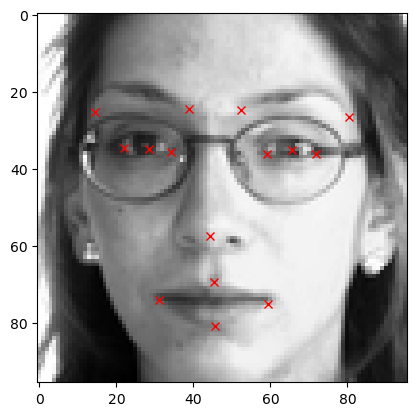

In [7]:
i = np.random.randint(1,len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i],cmap='gray')

for j in range(1,31,2):
    plt.plot(keyfacial_df.loc[i][j-1],keyfacial_df.loc[i][j],'rx')

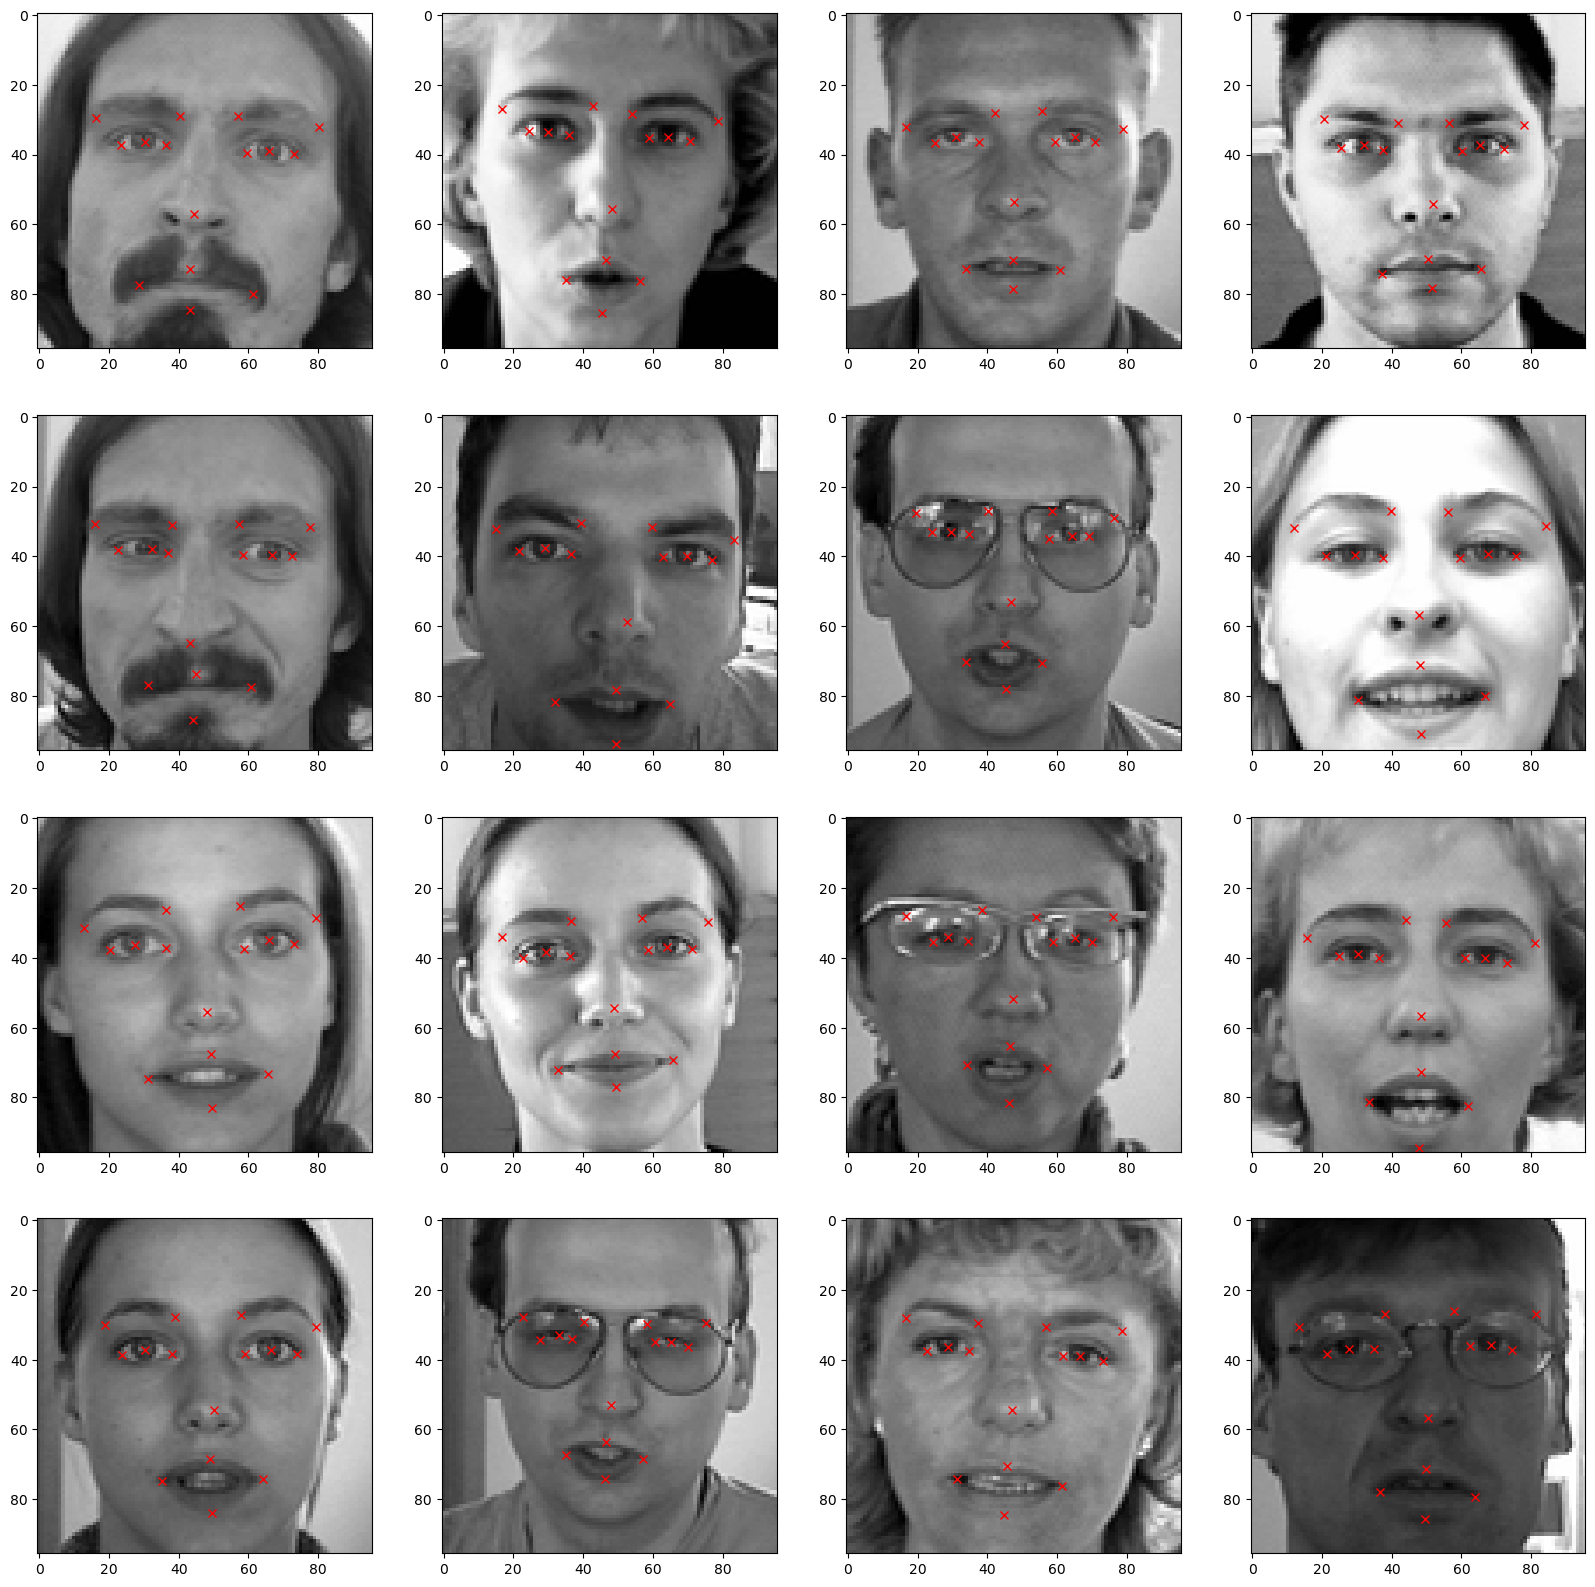

In [8]:
fig = plt.figure(figsize=(20,20))
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    image = plt.imshow(keyfacial_df['Image'][i],cmap='gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[i][j-1],keyfacial_df.loc[i][j],'rx')

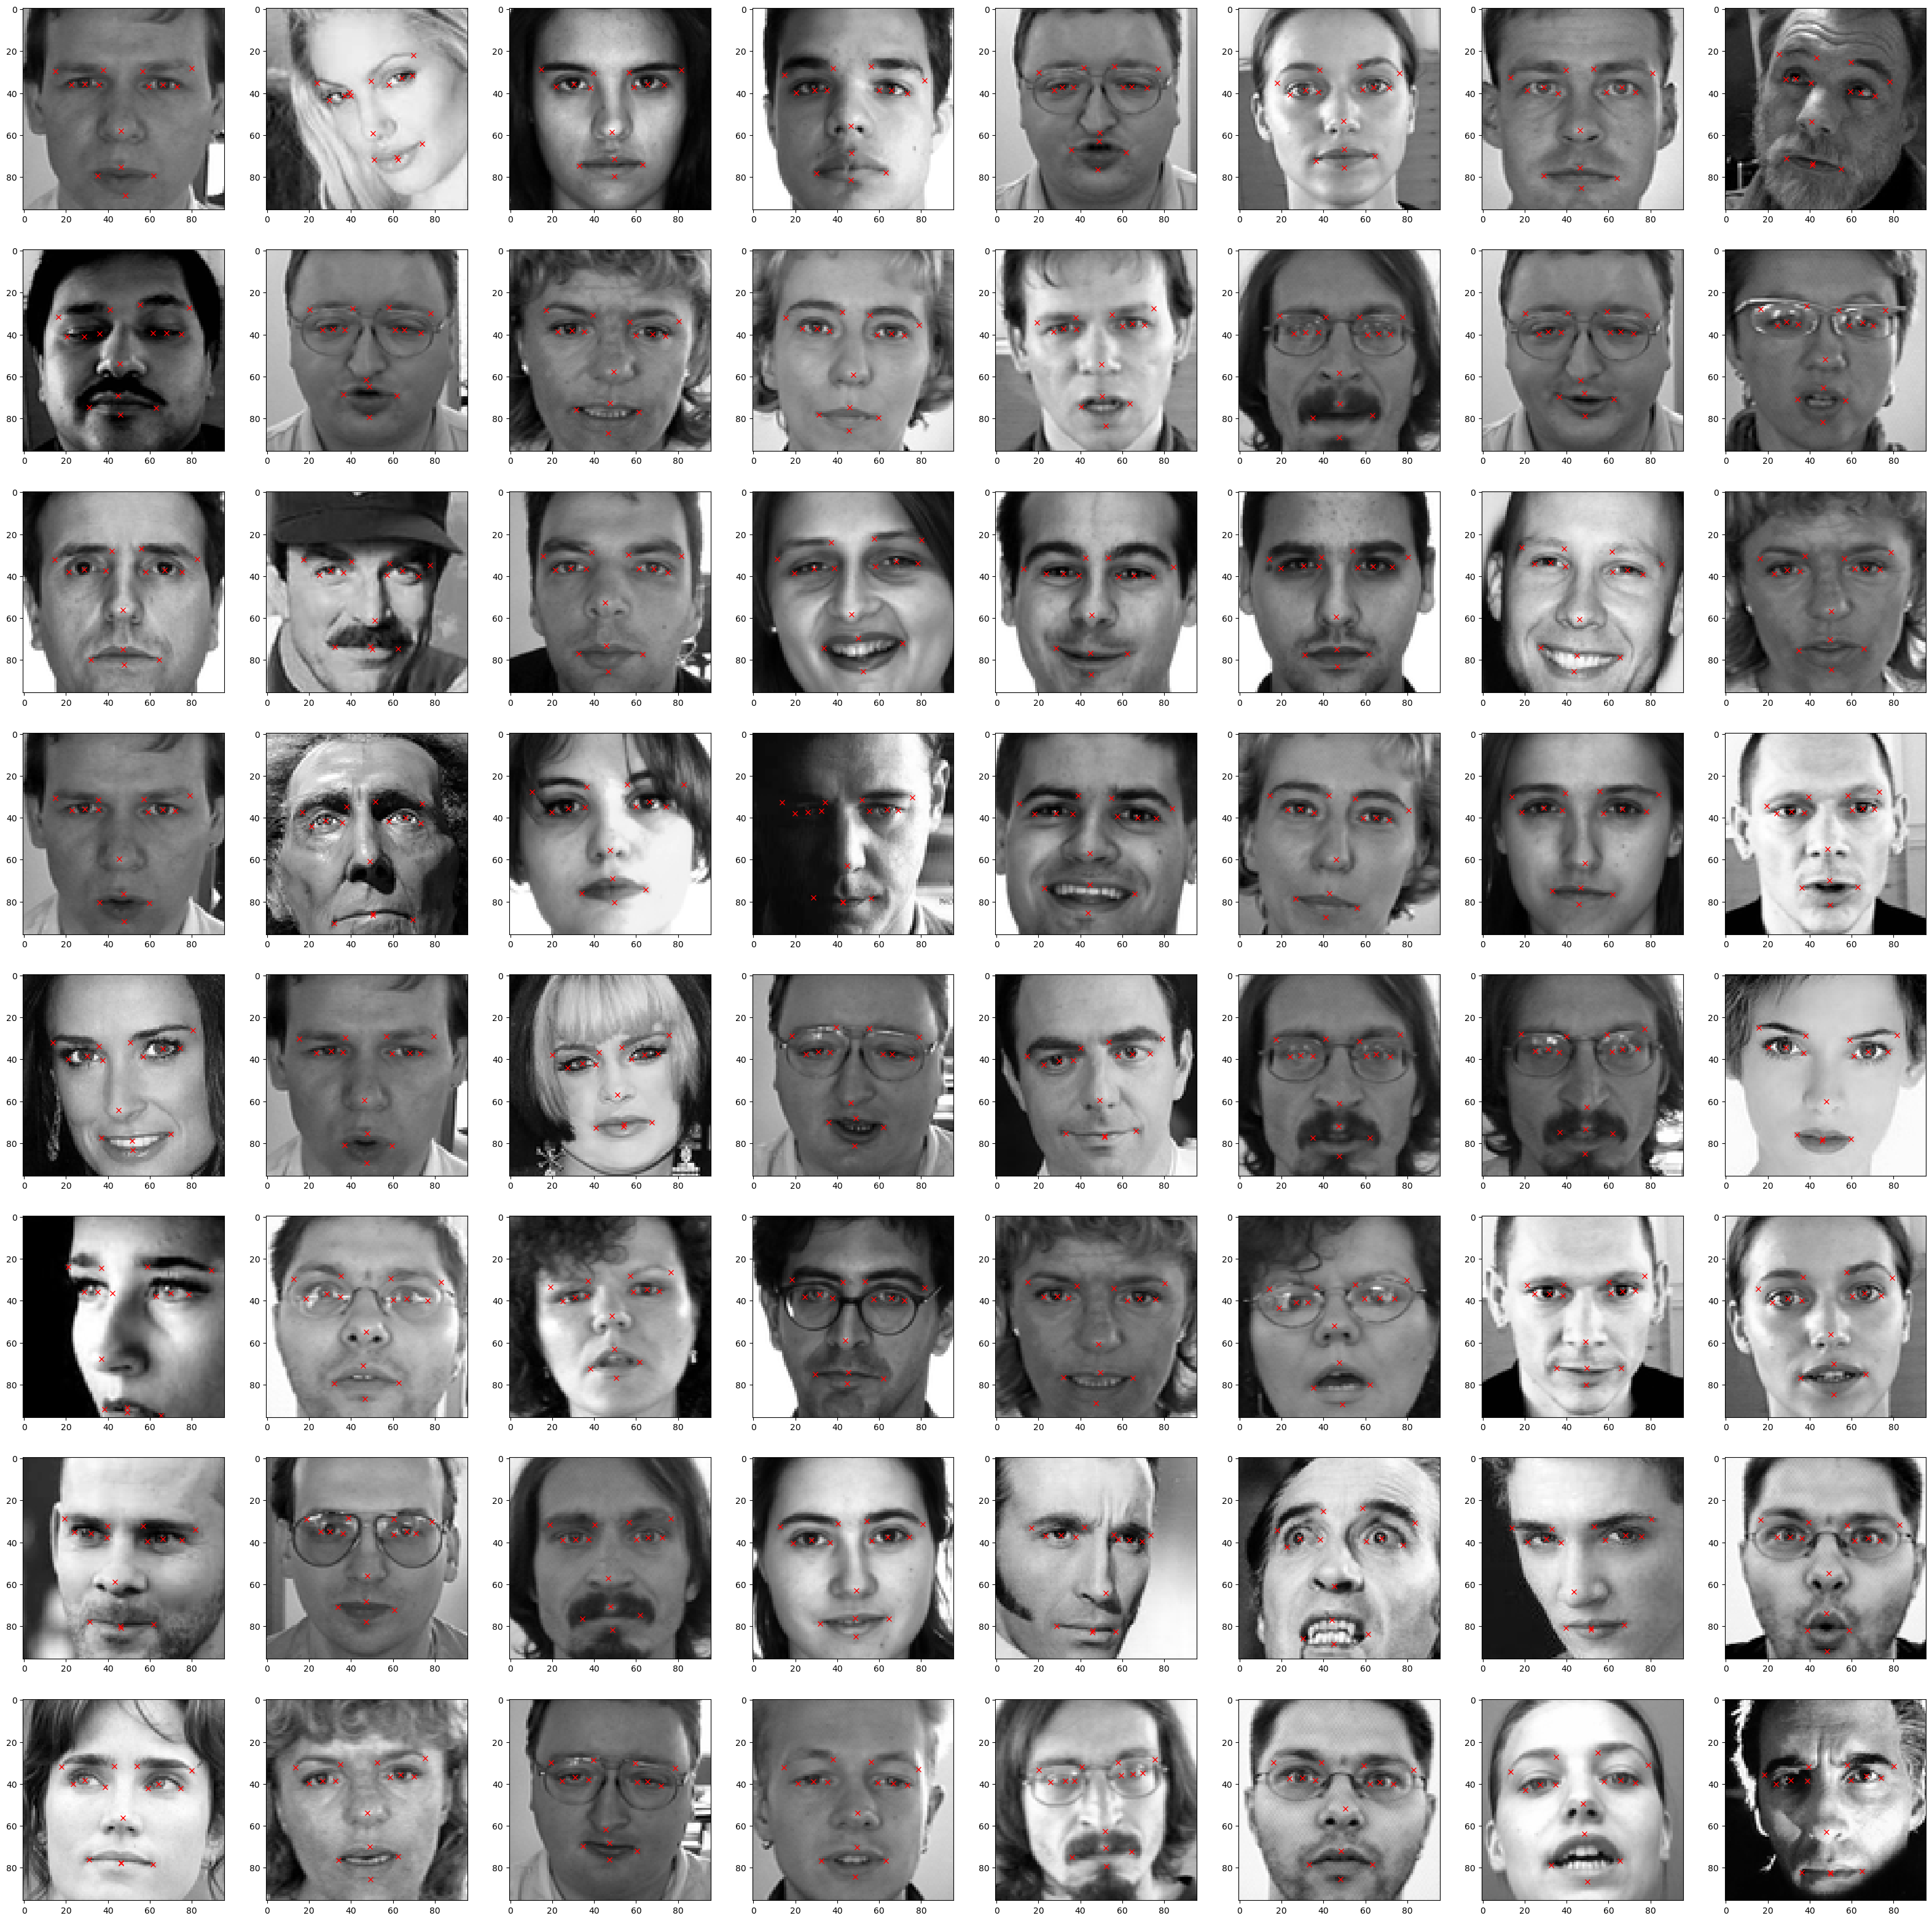

In [9]:
fig = plt.figure(figsize=(40,40))
for i in range(64):
    k = np.random.randint(1,len(keyfacial_df))
    ax = fig.add_subplot(8,8,i+1)
    image = plt.imshow(keyfacial_df['Image'][k],cmap='gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[k][j-1],keyfacial_df.loc[k][j],'rx')

### Image Augmentation 

In [10]:
keyfacial_df_copy = copy.copy(keyfacial_df)

In [11]:
columns = keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [12]:
#Horizontal Flipping
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x,axis=1))

for i in range(len(columns)):
    if i%2 == 0:
        keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x:96. - float(x))

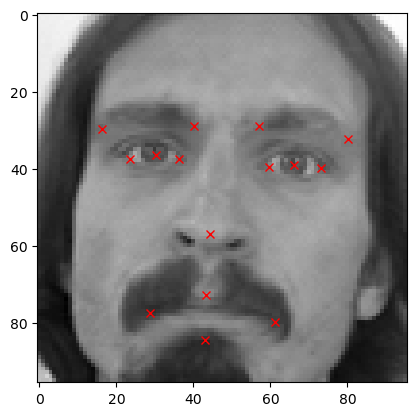

In [13]:
plt.imshow(keyfacial_df['Image'][0],cmap='gray')
for j in range(1,31,2):
    plt.plot(keyfacial_df.loc[0][j-1],keyfacial_df.loc[0][j],'rx')

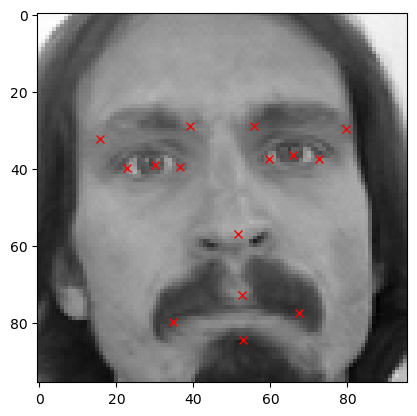

In [14]:
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
    plt.plot(keyfacial_df_copy.loc[0][j-1],keyfacial_df_copy.loc[0][j],'rx')

In [15]:
augmented_df = np.concatenate((keyfacial_df,keyfacial_df_copy))

In [16]:
augmented_df.shape

(4280, 31)

In [17]:
#Randomly increasing the brightness of the images
keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x:np.clip(random.uniform(1.5,2)*x,0.0,255.0))
augmented_df = np.concatenate((augmented_df,keyfacial_df_copy))
augmented_df.shape

(6420, 31)

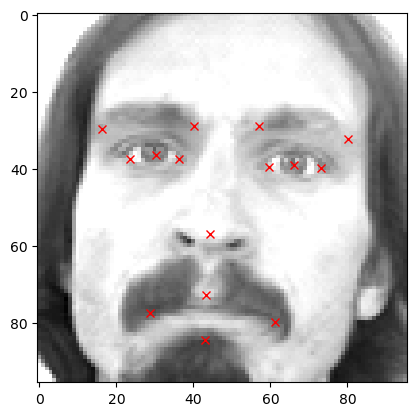

In [18]:
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
    plt.plot(keyfacial_df_copy.loc[0][j-1],keyfacial_df_copy.loc[0][j],'rx')

In [19]:
#Vertical Flipping
keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x,axis=0))
for i in range(len(columns)):
    if i % 2 == 1:
        keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96.-float(x))

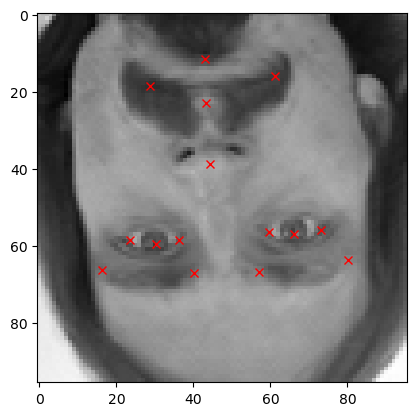

In [20]:
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
    plt.plot(keyfacial_df_copy.loc[0][j-1],keyfacial_df_copy.loc[0][j],'rx')

### Training Data Preparation 

In [21]:
img = augmented_df[:,30]
img = img/255
X = np.empty((len(img),96,96,1))
for i in range(len(img)):
    X[i,] = np.expand_dims(img[i],axis=2)
    
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [22]:
y = augmented_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
X_train.shape

(5136, 96, 96, 1)

In [25]:
X_test.shape

(1284, 96, 96, 1)

### RESNET Preperation

In [26]:
def res_block(X, filter, stage):

        # Convolutional_block
        X_copy = X

        f1, f2, f3 = filter

        # Main Path
        X = Conv2D(f1, kernel_size = (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
        X = MaxPool2D((2,2))(X)
        X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
        X = Activation('relu')(X) 

        X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
        X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
        X = Activation('relu')(X) 

        X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
        X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


        # Short path
        X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
        X_copy = MaxPool2D((2,2))(X_copy)
        X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)





        # ADD
        X = Add()([X,X_copy])
        X = Activation('relu')(X)




        # Identity Block 1
        X_copy = X


        # Main Path
        X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
        X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
        X = Activation('relu')(X) 

        X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
        X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
        X = Activation('relu')(X) 

        X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
        X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

        # ADD
        X = Add()([X,X_copy])
        X = Activation('relu')(X)

        # Identity Block 2
        X_copy = X


        # Main Path
        X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
        X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
        X = Activation('relu')(X) 

        X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
        X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
        X = Activation('relu')(X) 

        X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
        X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

        # ADD
        X = Add()([X,X_copy])
        X = Activation('relu')(X)

        return X


In [27]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128,128,512], stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   3200        ['zero_padding2d[0][0]']         
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1[0][0]']                  
                                                                                              

                                                                                                  
 activation_8 (Activation)      (None, 11, 11, 64)   0           ['bn_2_identity_2_b[0][0]']      
                                                                                                  
 res_2_identity_2_c (Conv2D)    (None, 11, 11, 256)  16640       ['activation_8[0][0]']           
                                                                                                  
 bn_2_identity_2_c (BatchNormal  (None, 11, 11, 256)  1024       ['res_2_identity_2_c[0][0]']     
 ization)                                                                                         
                                                                                                  
 add_2 (Add)                    (None, 11, 11, 256)  0           ['bn_2_identity_2_c[0][0]',      
                                                                  'activation_6[0][0]']           
          

                                                                                                  
 res_3_identity_2_c (Conv2D)    (None, 5, 5, 512)    66048       ['activation_17[0][0]']          
                                                                                                  
 bn_3_identity_2_c (BatchNormal  (None, 5, 5, 512)   2048        ['res_3_identity_2_c[0][0]']     
 ization)                                                                                         
                                                                                                  
 add_5 (Add)                    (None, 5, 5, 512)    0           ['bn_3_identity_2_c[0][0]',      
                                                                  'activation_15[0][0]']          
                                                                                                  
 activation_18 (Activation)     (None, 5, 5, 512)    0           ['add_5[0][0]']                  
          

### Key facial Piont Model Training

In [28]:
adam = optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

In [29]:
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

In [30]:
#history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_split = 0.05, callbacks=[checkpointer])

In [31]:
# model_json = model_1_facialKeyPoints.to_json()
# with open("FacialKeyPoints-model.json","w") as json_file:
#   json_file.write(model_json)

In [32]:
with open('Emotion AI Dataset/detection.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# load the model architecture 
model_1_facialKeyPoints = keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('Emotion AI Dataset/weights_keypoint.hdf5')
adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

In [33]:
result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 7s 142ms/step - loss: 8.1925 - accuracy: 0.8396
Accuracy : 0.8395638465881348


In [34]:
#history.history.keys()

In [35]:
# Plot the training artifacts

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train_loss','val_loss'], loc = 'upper right')
# plt.show()

## Facial Expression Detection

In [36]:
facialexpression_df = pd.read_csv('Emotion AI Dataset/icml_face_data.csv')

In [37]:
facialexpression_df.head()

emotion                                             pixels
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3        2  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4        3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...

In [38]:
facialexpression_df[' pixels'][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [39]:
def string2array(x):
    return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

def resize(x):
    img = x.reshape(48, 48)
    return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [40]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x))
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))

In [41]:
facialexpression_df.head()

emotion                                             pixels
0        0  [[69.316925, 73.03865, 79.13719, 84.17186, 85....
1        0  [[151.09435, 150.91393, 150.65791, 148.96367, ...
2        2  [[23.061905, 25.50914, 29.47847, 33.99843, 36....
3        2  [[20.083221, 19.079437, 17.398712, 17.158691, ...
4        3  [[76.26172, 76.54747, 77.001785, 77.7672, 78.4...

In [42]:
facialexpression_df.shape

(24568, 2)

In [43]:
facialexpression_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [44]:
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

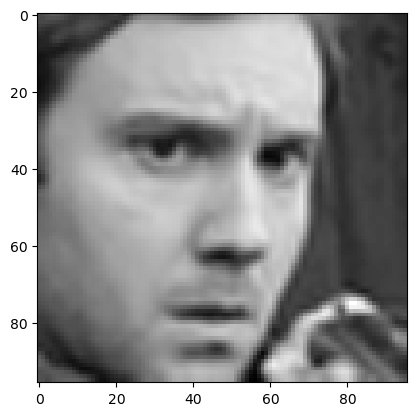

In [45]:
plt.imshow(facialexpression_df[' pixels'][0], cmap = 'gray')

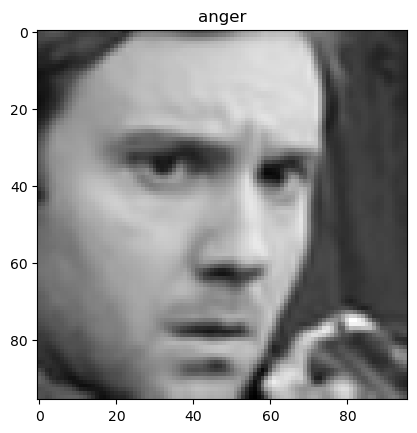

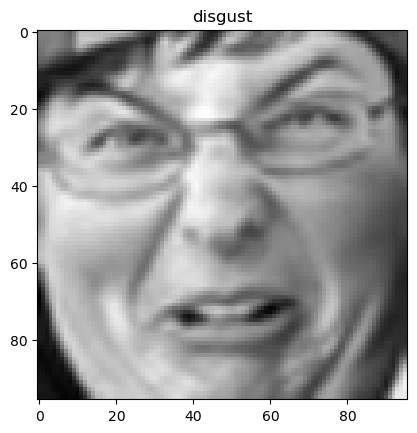

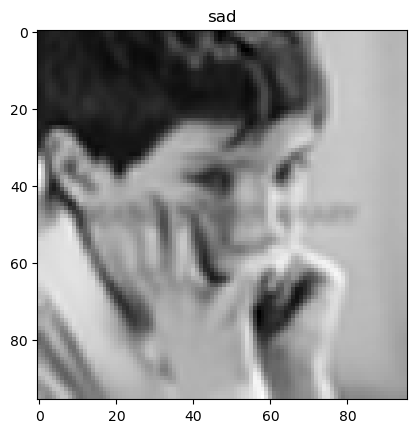

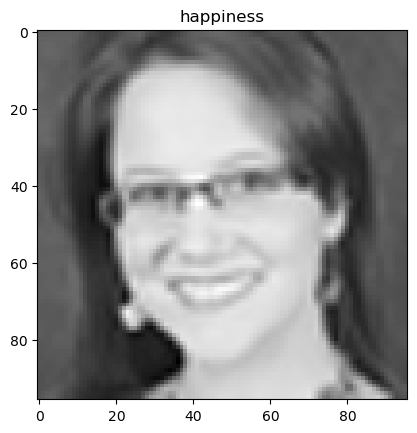

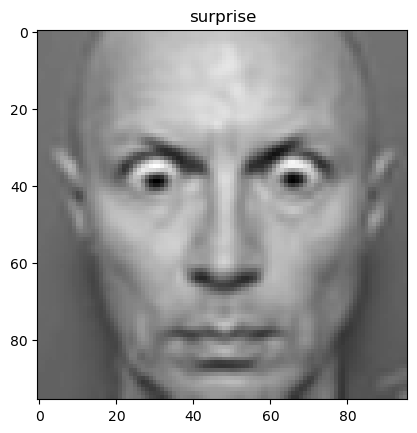

In [46]:
emotions = [0, 1, 2, 3, 4]

for i in emotions:
    data = facialexpression_df[facialexpression_df['emotion'] == i][:1]
    img = data[' pixels'].item()
    img = img.reshape(96, 96)
    plt.figure()
    plt.title(label_to_text[i])
    plt.imshow(img, cmap = 'gray')

<AxesSubplot: ylabel='emotion'>

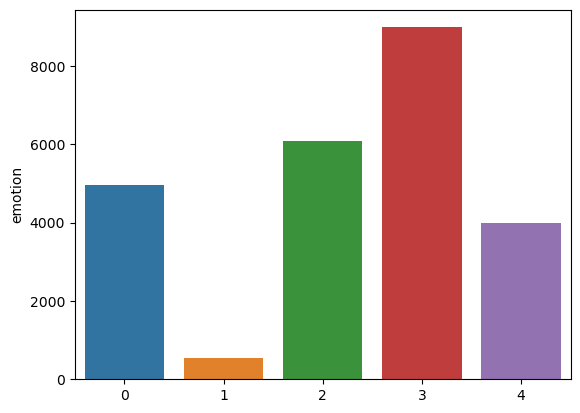

In [47]:
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts())

### Image Augmentation

In [48]:
from keras.utils import to_categorical

X = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])

In [49]:
X[0]

array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
         40.5394  ],
       [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
         41.223618],
       [ 67.768814,  67.71646 ,  67.67172 , ...,  47.39473 ,  44.26329 ,
         42.31465 ],
       ...,
       [ 74.89021 ,  76.79553 ,  79.90259 , ...,  71.463425,  59.32875 ,
         51.74736 ],
       [ 76.68126 ,  75.808105,  74.25452 , ...,  93.943375,  79.77934 ,
         71.13246 ],
       [ 77.63858 ,  75.15074 ,  70.8846  , ..., 107.66351 ,  92.23212 ,
         82.91585 ]], dtype=float32)

In [50]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [51]:
X = np.stack(X, axis = 0)
X = X.reshape(24568, 96, 96, 1)

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)

In [53]:
print(X_val.shape, y_val.shape)

(1228, 96, 96, 1) (1228, 5)


In [54]:
print(X_Test.shape, y_Test.shape)

(1229, 96, 96, 1) (1229, 5)


In [55]:
print(X_train.shape, y_train.shape)

(22111, 96, 96, 1) (22111, 5)


In [56]:
X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [57]:
train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest")

### Model Preparation

In [58]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 102, 102, 1)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   3200        ['zero_padding2d_1[0][0]']       
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1[0][0]']           

 ization)                                                                                         
                                                                                                  
 activation_27 (Activation)     (None, 11, 11, 64)   0           ['bn_2_identity_2_b[0][0]']      
                                                                                                  
 res_2_identity_2_c (Conv2D)    (None, 11, 11, 256)  16640       ['activation_27[0][0]']          
                                                                                                  
 bn_2_identity_2_c (BatchNormal  (None, 11, 11, 256)  1024       ['res_2_identity_2_c[0][0]']     
 ization)                                                                                         
                                                                                                  
 add_8 (Add)                    (None, 11, 11, 256)  0           ['bn_2_identity_2_c[0][0]',      
          

 activation_36 (Activation)     (None, 5, 5, 128)    0           ['bn_3_identity_2_b[0][0]']      
                                                                                                  
 res_3_identity_2_c (Conv2D)    (None, 5, 5, 512)    66048       ['activation_36[0][0]']          
                                                                                                  
 bn_3_identity_2_c (BatchNormal  (None, 5, 5, 512)   2048        ['res_3_identity_2_c[0][0]']     
 ization)                                                                                         
                                                                                                  
 add_11 (Add)                   (None, 5, 5, 512)    0           ['bn_3_identity_2_c[0][0]',      
                                                                  'activation_34[0][0]']          
                                                                                                  
 activatio

In [59]:
# train the network
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [60]:
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)

In [61]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
    epochs= 2, callbacks=[checkpointer, earlystopping])

Epoch 1/2
345/345 [==============================] - ETA: 0s - loss: 1.2372 - accuracy: 0.4994
Epoch 1: val_loss improved from inf to 1.62580, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 306s 881ms/step - loss: 1.2372 - accuracy: 0.4994 - val_loss: 1.6258 - val_accuracy: 0.4406
Epoch 2/2
345/345 [==============================] - ETA: 0s - loss: 0.9147 - accuracy: 0.6377
Epoch 2: val_loss improved from 1.62580 to 1.11214, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 303s 879ms/step - loss: 0.9147 - accuracy: 0.6377 - val_loss: 1.1121 - val_accuracy: 0.5383


In [62]:
# saving the model architecture to json file for future use

model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json","w") as json_file:
  json_file.write(model_json)

In [65]:
with open('Emotion AI Dataset/emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# load the model architecture 
model_2_emotion = keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights('Emotion AI Dataset/weights_emotions.hdf5')
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [66]:
score = model_2_emotion.evaluate(X_Test, y_Test)
print('Test Accuracy: {}'.format(score[1]))

39/39 [==============================] - 5s 110ms/step - loss: 0.3512 - accuracy: 0.8706
Test Accuracy: 0.8706265091896057


In [67]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [68]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

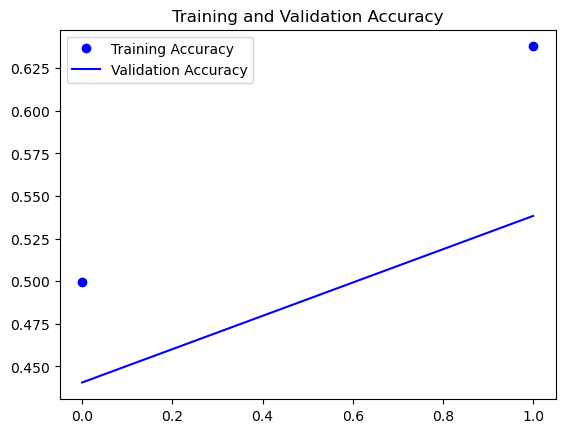

In [69]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

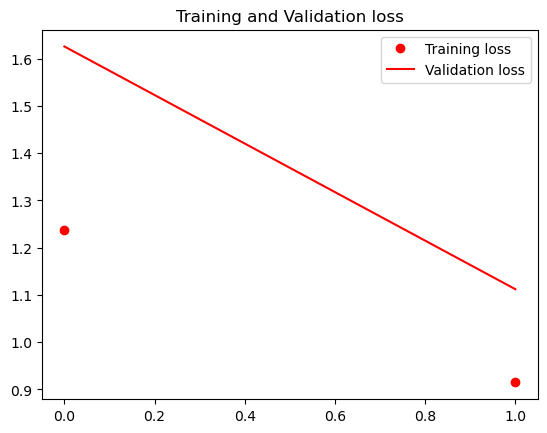

In [70]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [71]:
predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)

39/39 [==============================] - 5s 112ms/step


In [72]:
y_true.shape

(1229,)

<AxesSubplot: >

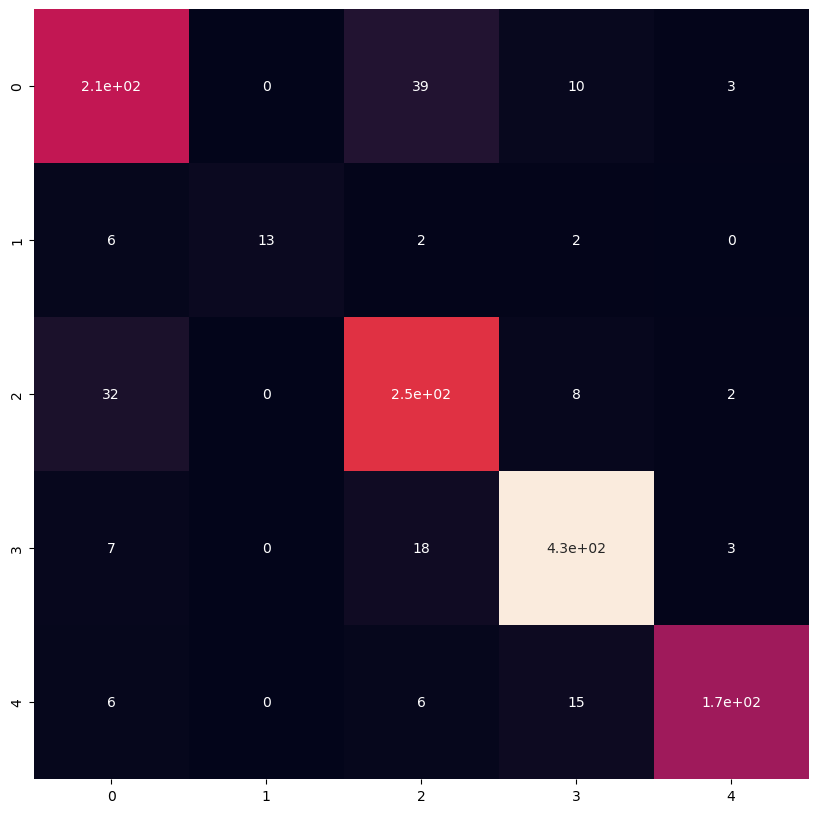

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

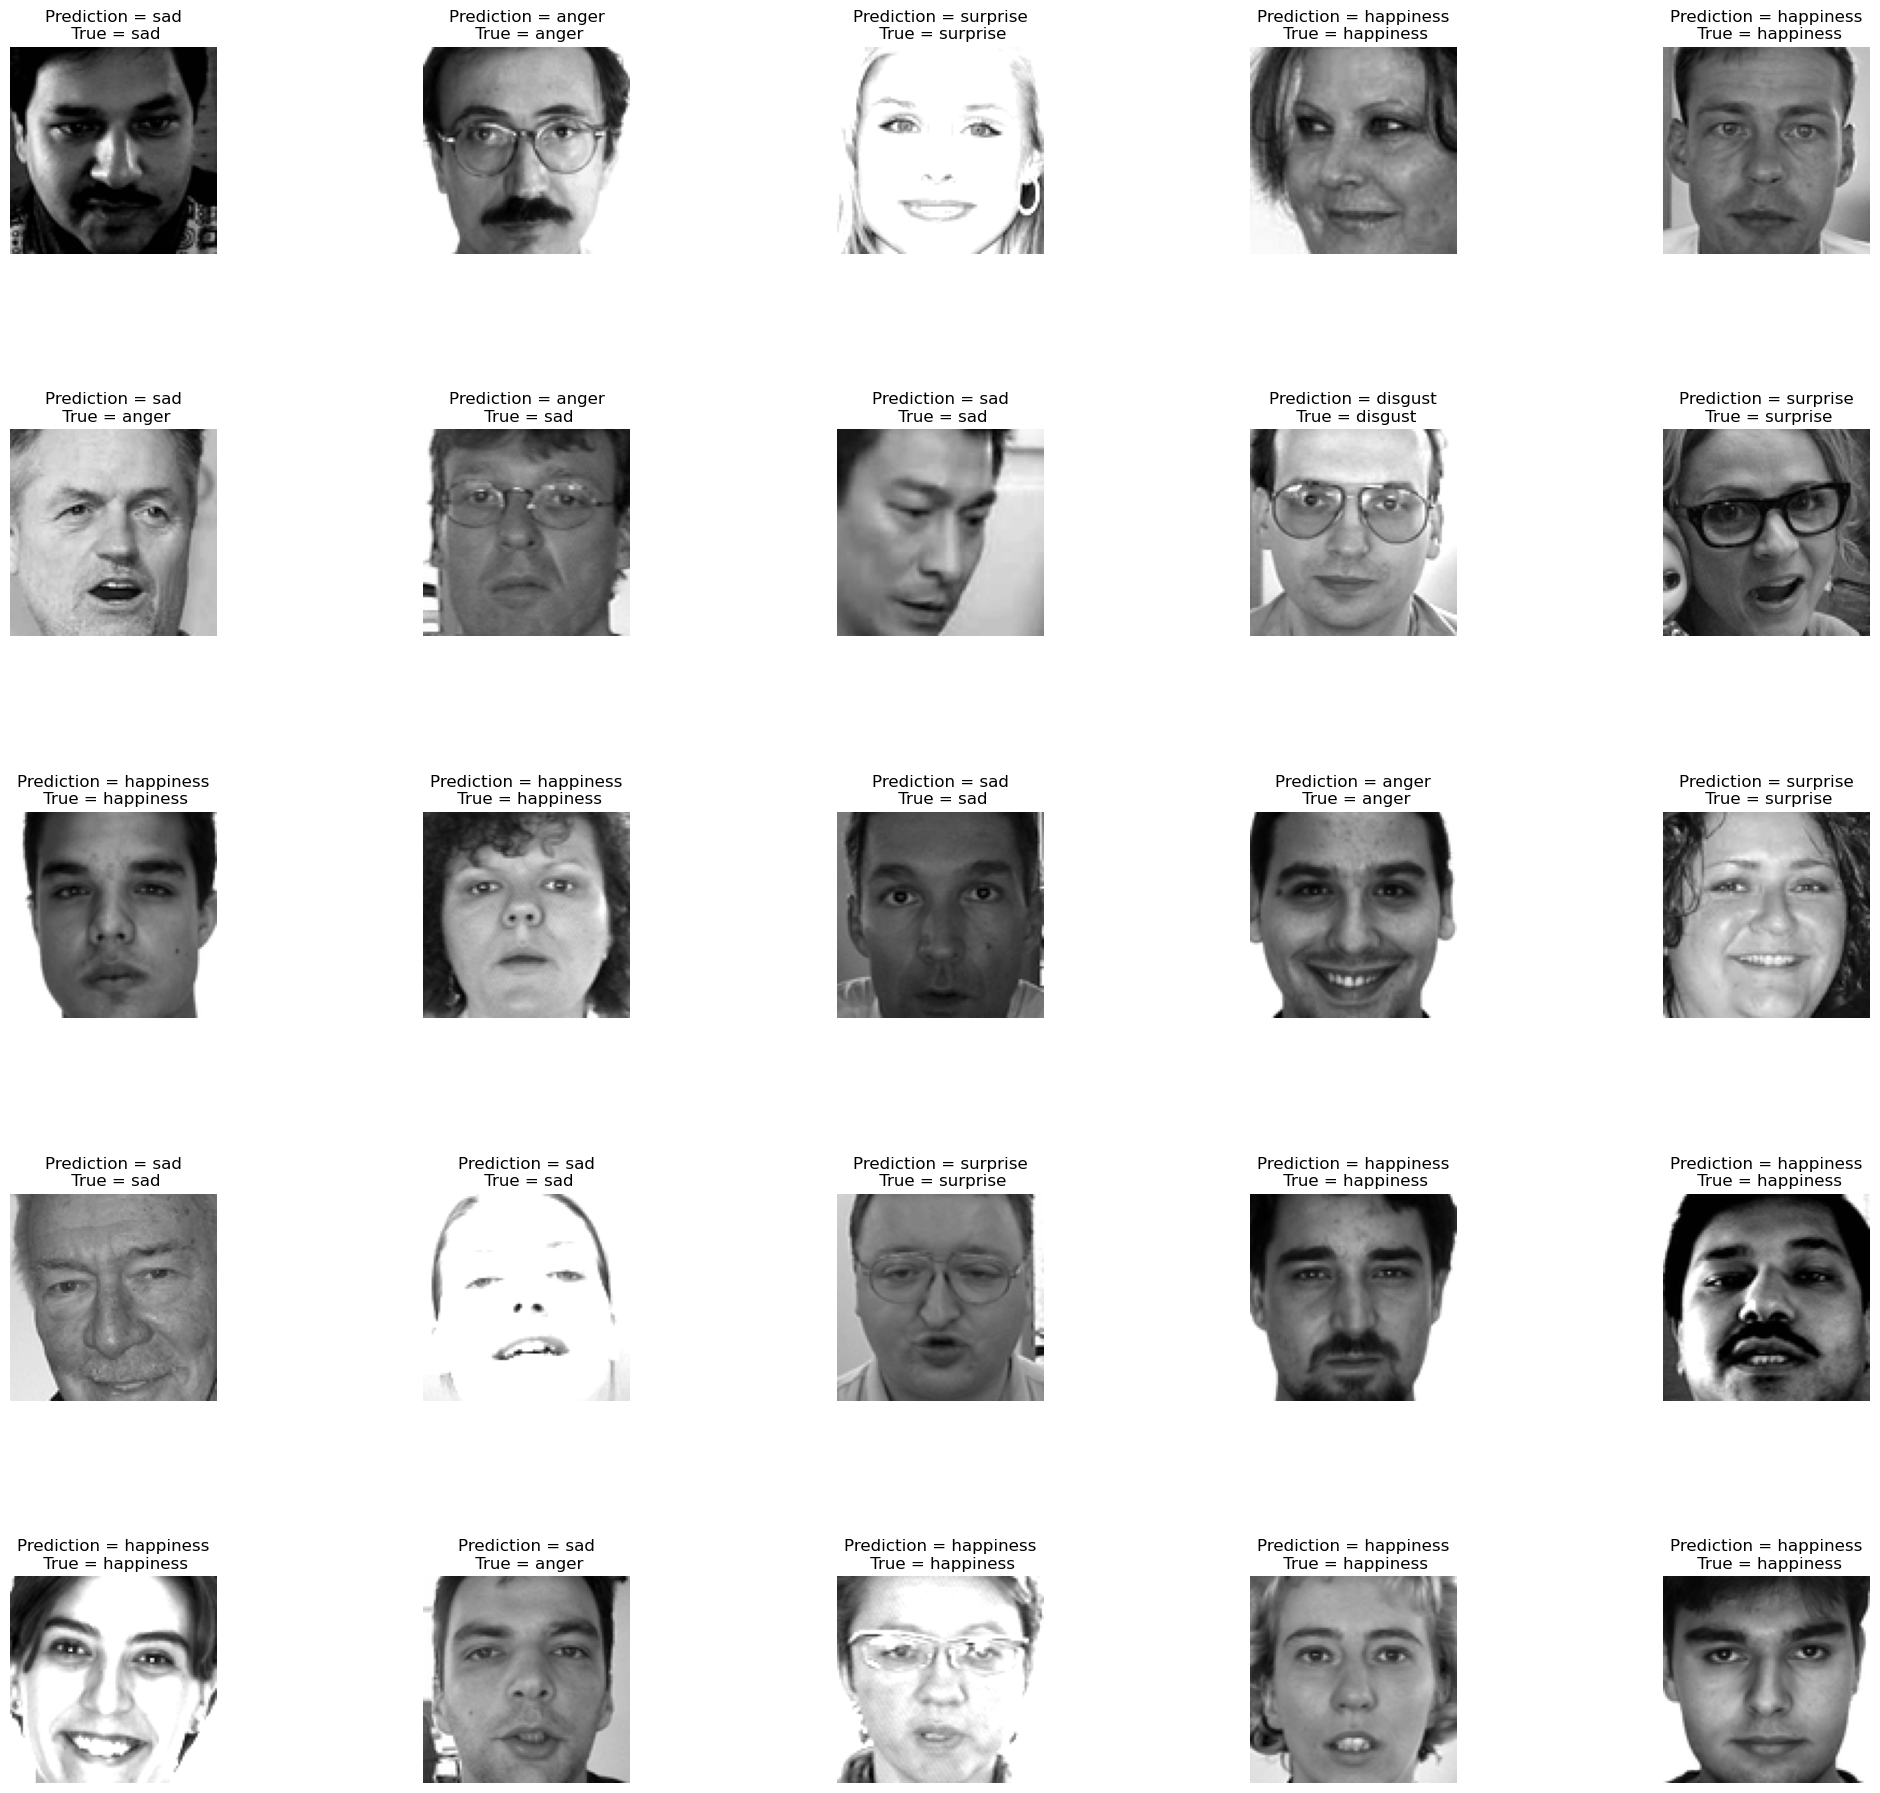

In [76]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       259
           1       1.00      0.57      0.72        23
           2       0.79      0.85      0.82       288
           3       0.93      0.94      0.93       461
           4       0.96      0.86      0.91       198

    accuracy                           0.87      1229
   macro avg       0.89      0.80      0.84      1229
weighted avg       0.87      0.87      0.87      1229



## Combining Both Models

In [79]:
def predict(X_test):

  # Making prediction from the keypoint model
    df_predict = model_1_facialKeyPoints.predict(X_test)

  # Making prediction from the emotion model
    df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1)

  # Reshaping array from (856,) to (856,1)
    df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
    df_predict = pd.DataFrame(df_predict, columns= columns)

  # Adding emotion into the predicted dataframe
    df_predict['emotion'] = df_emotion

    return df_predict

In [80]:
df_predict = predict(X_test)

41/41 [==============================] - 4s 105ms/step


In [81]:
df_predict.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          68.295174          36.519981           30.139648   
1          64.135704          39.847198           29.684027   
2          67.141464          39.552120           29.980167   
3          63.308521          35.531696           31.337017   
4          64.935532          39.083138           31.451315   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           37.159393                62.126793                37.501820   
1           40.921570                57.443939                41.044460   
2           37.568771                59.537819                40.153728   
3           36.159706                55.943413                37.153263   
4           38.023865                58.052887                39.826977   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                74.904709                36.701866                 36.360954   
1                70.829994                40.192272                 36.256275   
2                74.840515                40.798344                 37.249287   
3                70.315567                35.870346                 36.758343   
4                71.408669                40.229687                 37.473076   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.748280  ...   61.823845            63.448872   
1                 41.488579  ...   64.957031            63.443340   
2                 38.776905  ...   58.122787            63.827045   
3                 37.285126  ...   62.872002            63.540085   
4                 38.933922  ...   57.610561            61.817844   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            75.748016             35.253681             76.132706   
1            82.589516             32.955643             83.619354   
2            76.104874             31.219452             74.852051   
3            78.308578             40.448490             78.436531   
4            79.299591             30.689001             77.937164   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               49.228783               73.972672                  49.397522   
1               48.496334               80.123062                  48.626987   
2               47.089886               75.155846                  46.924026   
3               48.459084               78.824005                  49.113087   
4               45.475365               74.485512                  45.388363   

   mouth_center_bottom_lip_y  emotion  
0                  82.804390        2  
1                  88.014725        3  
2                  79.964653        3  
3                  80.827774        3  
4                  84.253311        2  

[5 rows x 31 columns]

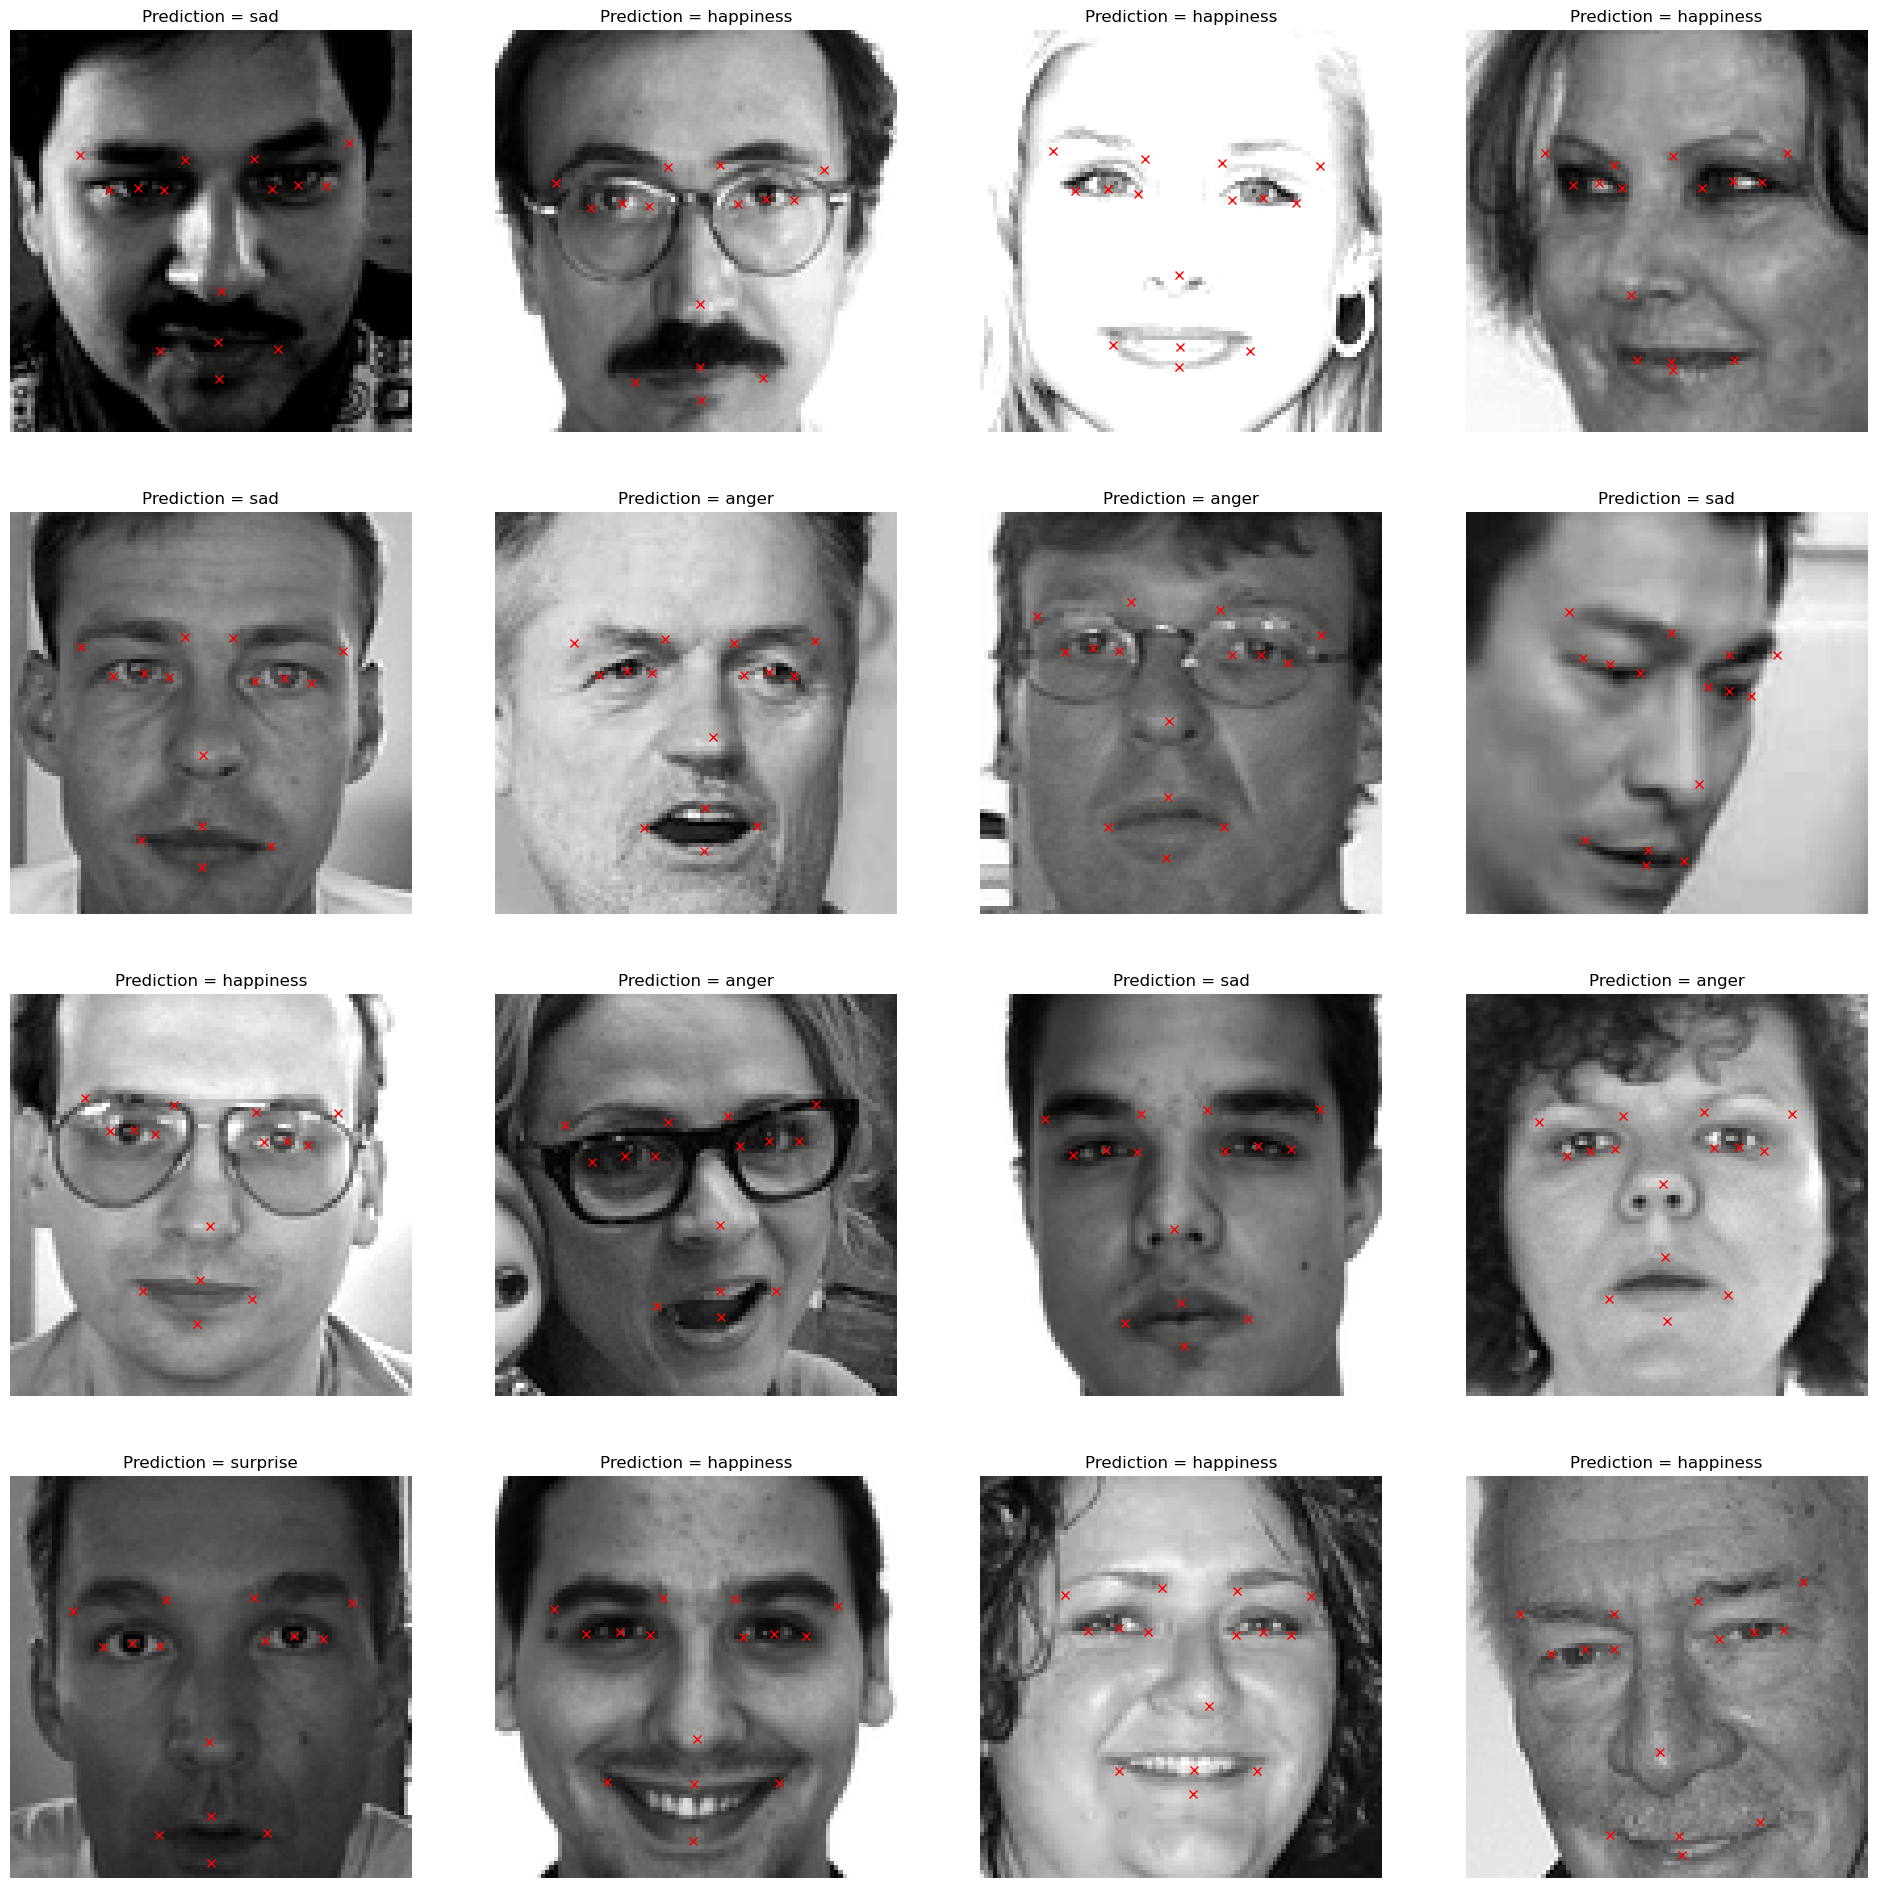

In [82]:

fig, axes = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()

for i in range(16):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')